# **Table of Contents**
1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Split the data into training and testing](#4)
5. [Implementation with StatsForecast](#5)
6. [Evaluate the model](#6)
7. [Conclusion](#7)
8. [References](8)

<a id="1"></a> 
# **Introduction**

Price forecasting in the real estate market is of great importance for both buyers and sellers, investors and professionals in the sector. The ability to accurately predict future changes in real estate prices allows for more informed and strategic decision making. In this context, time series modeling is presented as a powerful tool to analyze and forecast patterns and trends in the real estate market.

Time series modeling is based on the idea that real estate price data exhibit a temporal structure, where past observations influence future ones. These observations may include information on market developments, economic factors, changes in supply and demand, among others. By capturing and analyzing these temporal patterns, time series models can provide accurate and reliable forecasts of real estate prices in the future.

By applying time series models to real estate price forecasting, it is possible to identify and take advantage of long-term trends, seasonalities, economic cycles, and special events that can affect prices. Furthermore, these models are flexible and can adapt to different time scales, from daily forecasts to long-term forecasts.

Time series modeling for real estate price forecasting involves several steps. First, historical price data is collected and prepared, taking into account factors such as the frequency of the data and the availability of additional information, such as property characteristics, geographic location, interest rates, among others. Exploratory data analysis is then performed to identify patterns, trends and seasonality in prices.

In summary, time series modeling offers an effective methodology for real estate price forecasting. By leveraging the temporal structure of data and analyzing past patterns and trends, these models provide a solid foundation for decision-making in the real estate market. By understanding the factors that influence prices and anticipating future changes, market players can make more informed decisions and maximize their opportunities in this dynamic sector.

<a id="2"></a>
# **Case study**

The objective of this case study is to use time series modeling techniques to forecast real estate prices in a given geographic area. It seeks to identify patterns, trends and seasonality in historical data and generate accurate forecasts to support decision making in the real estate market.

There is a historical data set of real estate prices in a specific city for the last 8 years. Each observation includes the sales date, sales price, and relevant property characteristics such as size, year of home, and others.

We will use different techniques for analysis and forecasting:

1. Data collection.
2. Exploratory data analysis.
3. Data preparation.
4. Model selection.
5. Model adjustment and evaluation.
6. Real estate price forecast.

Time series modeling applied to real estate price forecasting allows you to capture patterns and trends in historical data to generate accurate forecasts. These forecasts are valuable to buyers, sellers and investors in the real estate market, providing them with a solid basis for making informed decisions. By understanding the factors that influence prices and anticipating future changes, you can maximize your return on investment and minimize the risks associated with real estate transactions.

## **Import Library**

In [2]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose 
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5

## **Load data**

Information about our data:

* Transaction date
* House age
* Distance to the nearest MRT Station
* Number of convenience stores
* latitude
* Longitude
* House price of unit area

In [5]:
# First, let's load the data
df = pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/real_estate.csv",usecols=lambda column: column != 'Unnamed: 0', parse_dates=["transaction date"])
df

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012-01-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012-01-08,19.5,306.59470,9,24.98034,121.53951,42.2
2,2012-01-15,13.3,561.98450,5,24.98746,121.54391,47.3
3,2012-01-22,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012-01-29,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2019-11-03,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2019-11-10,5.6,90.45606,9,24.97433,121.54310,50.0
411,2019-11-17,18.8,390.96960,7,24.97923,121.53986,40.6
412,2019-11-24,8.1,104.81010,5,24.96674,121.54067,52.5


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [4]:
df["unique_id"]="1"
df=df.rename(columns={"transaction date": "ds", "house price of unit area": "y"})
df.head()

,ds,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,y,unique_id
0,2012-01-01,32.0,84.87882,10,24.98298,121.54024,37.9,1
1,2012-01-08,19.5,306.59470,9,24.98034,121.53951,42.2,1
2,2012-01-15,13.3,561.98450,5,24.98746,121.54391,47.3,1
3,2012-01-22,13.3,561.98450,5,24.98746,121.54391,54.8,1
4,2012-01-29,5.0,390.56840,5,24.97937,121.54245,43.1,1


In [ ]:
df.info()

# **Explore Data with the plot method** <a id="3"></a>

Graphical visualization of time series can be an effective strategy for detecting trends, patterns, and seasonality. This approach, in turn, makes it easier to identify potential lags that could be used as predictors in the model.

We will use the `plot` method of `Statsforecast` to visualize our data. This method prints 8 random series from the dataset and is useful for basic EDA.

This is what our data looks like, after having performed a couple of maneuvers on our data.

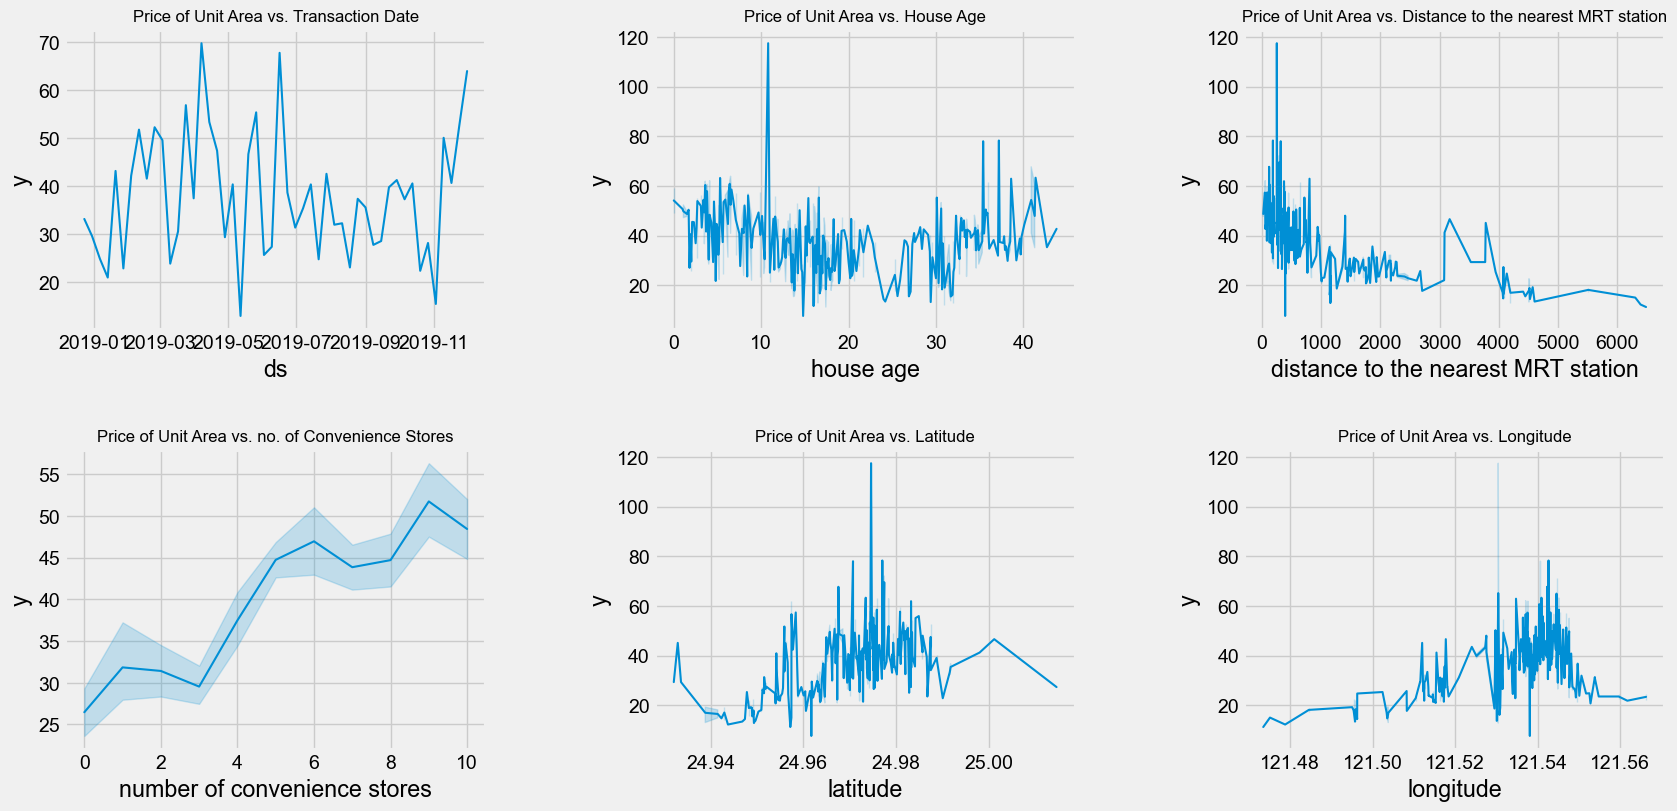

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(20, 9))
ax = ax.flatten()

sns.set()
sns.lineplot(data=df.tail(50), x="ds", y="y", ax=ax[0])
ax[0].set_title("Price of Unit Area vs. Transaction Date")

sns.lineplot(data=df, x="house age", y="y", ax=ax[1])
ax[1].set_title("Price of Unit Area vs. House Age")

sns.lineplot(data=df, x="distance to the nearest MRT station", y="y", ax=ax[2])
ax[2].set_title("Price of Unit Area vs. Distance to the nearest MRT station")

sns.lineplot(data=df, x="number of convenience stores", y="y", ax=ax[3])
ax[3].set_title("Price of Unit Area vs. no. of Convenience Stores")

sns.lineplot(data=df, x="latitude", y="y", ax=ax[4])
ax[4].set_title("Price of Unit Area vs. Latitude")

sns.lineplot(data=df, x="longitude", y="y", ax=ax[5])
ax[5].set_title("Price of Unit Area vs. Longitude")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show();

- We can clearly see that the price of housing per unit area is proportional to the number of convenience stores.
- Furthermore, we can see that the closer the house is to the nearest MRT station, the higher the price of the unit.
- The greater the number of convenience stores near the house, the higher the price per unit area.
- Unexpectedly, the age of the house is not proportional to the area unit price, but we can see a pattern and an obvious outlier.
- A pattern can be noticed in longitude and latitude, but we need to explore them further.

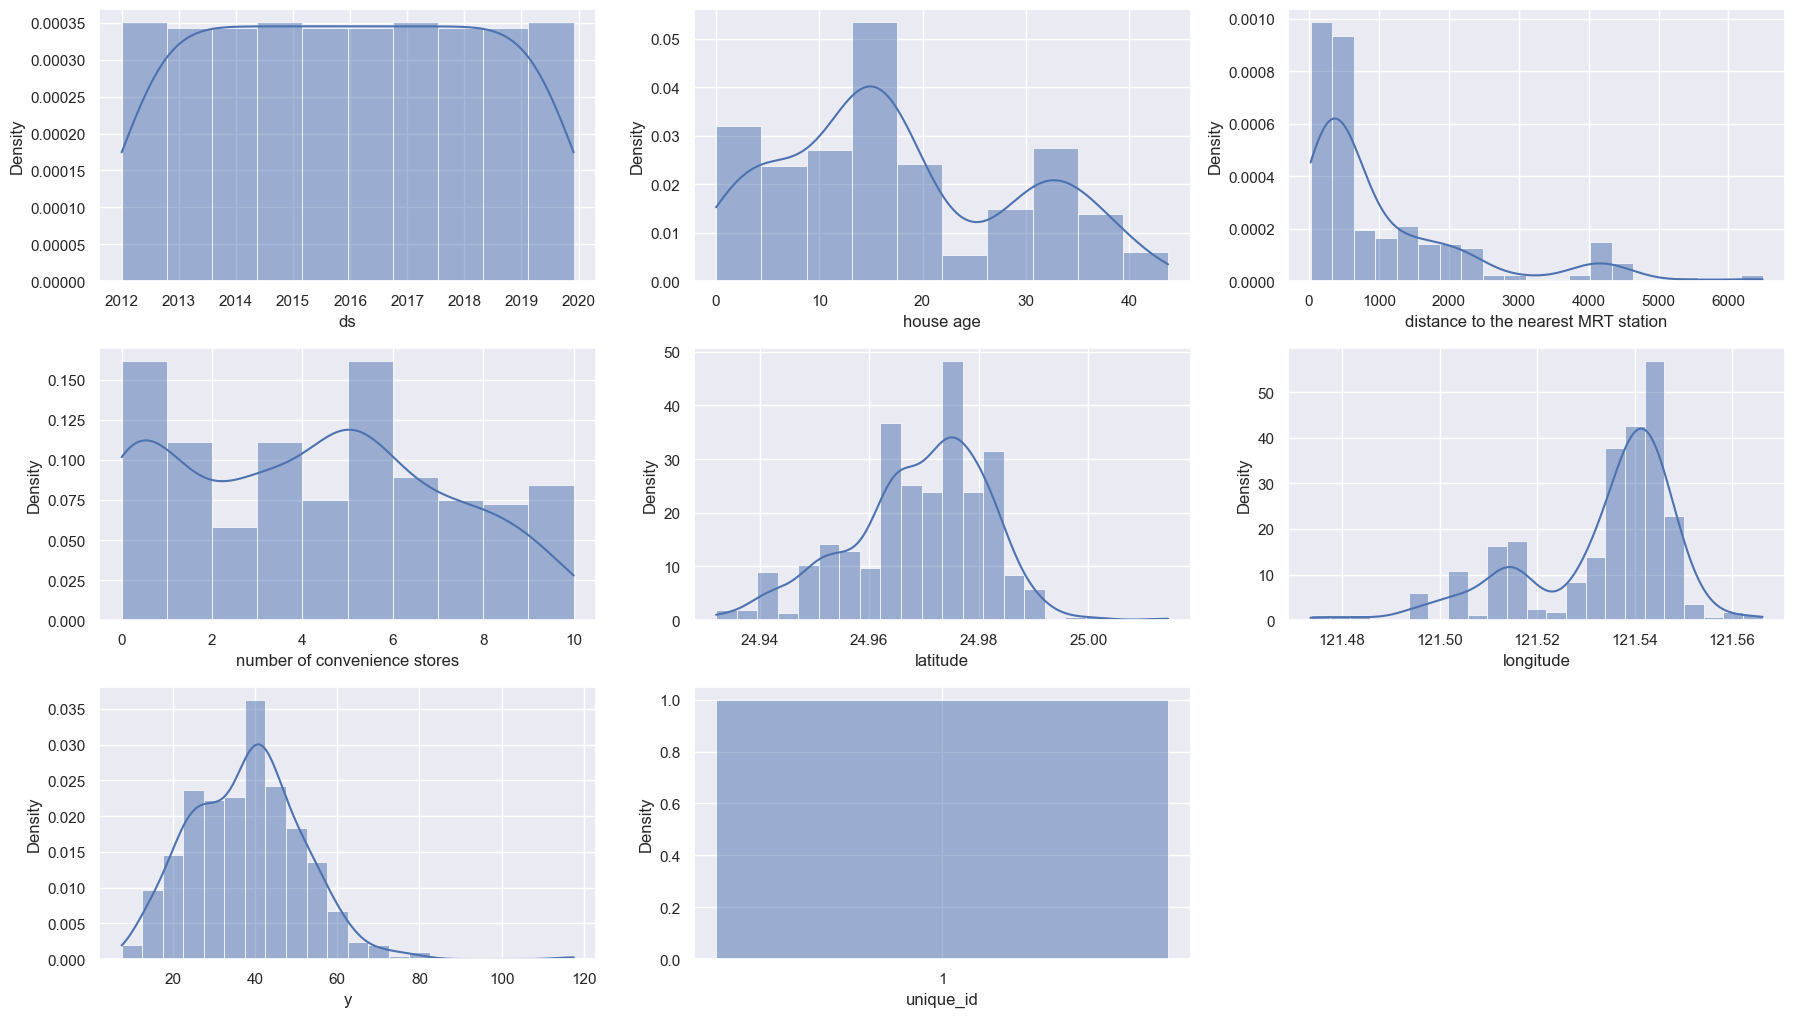

In [6]:
# Histograms
fig = plt.figure(figsize=(18,20))
for index,col in enumerate(df):
    plt.subplot(6,3,index+1)
    sns.histplot(df.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

In [7]:
# Corr to price of unit area
numeric_train = df
correlation = numeric_train.corr()
correlation[['y']].sort_values(['y'], ascending=False)

,y
y,1.000000
number of convenience stores,0.571005
latitude,0.546307
longitude,0.523287
ds,-0.028587
house age,-0.210567
distance to the nearest MRT station,-0.673613
unique_id,NaN


The number of convenience stores is moderately correlated with the price per unit area, while the distance to the nearest MRT station is negatively correlated.

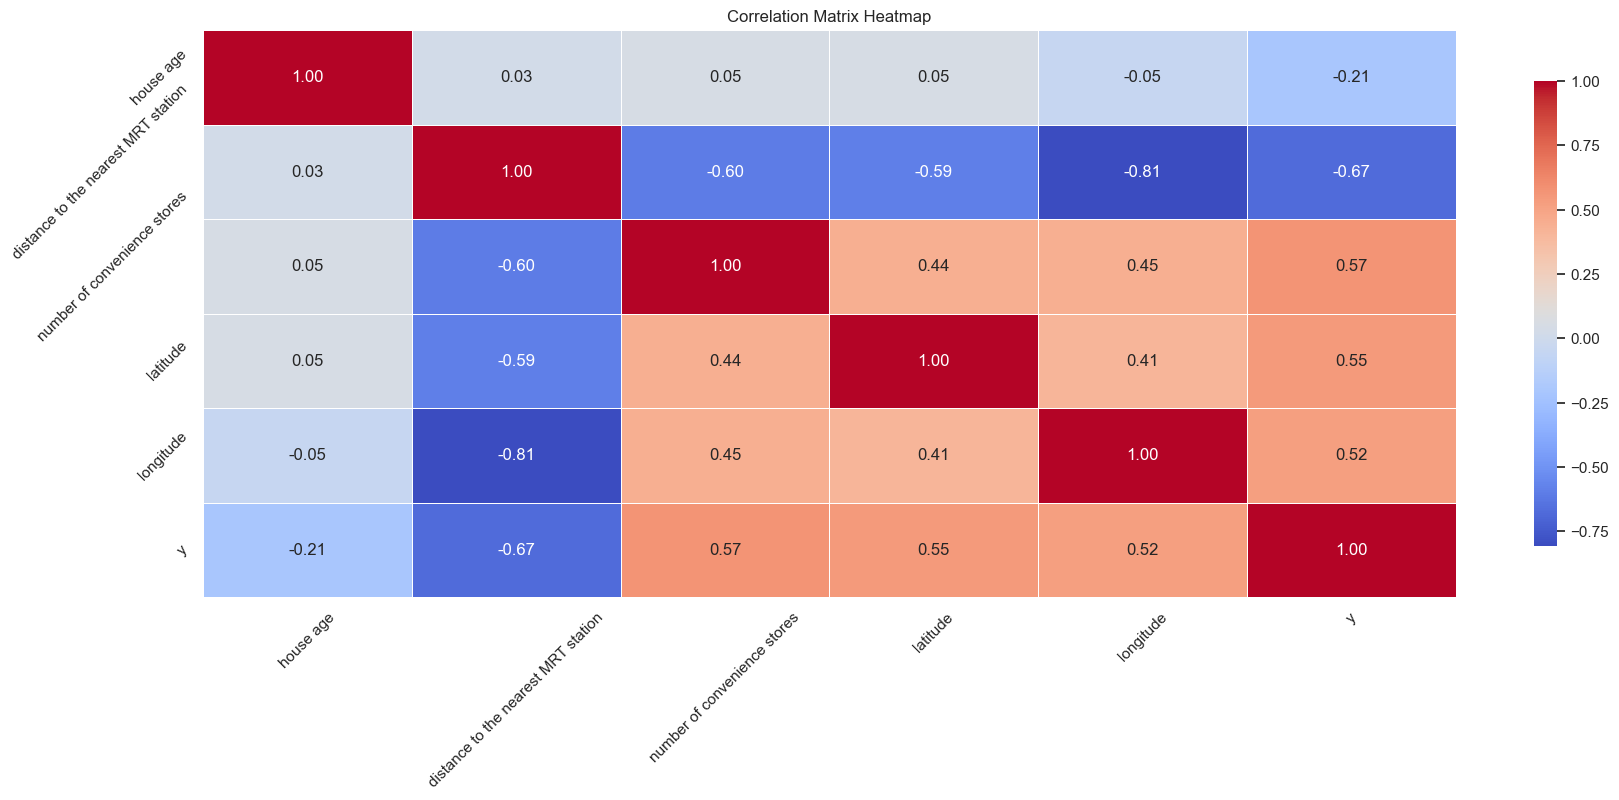

In [8]:
variables =df[["house age",	"distance to the nearest MRT station",	"number of convenience stores",	"latitude",	"longitude","y"]]
plt.figure(figsize=(18, 7))  # Set the figure size to be larger
sns.heatmap(variables.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt= '.2f', cbar_kws={"shrink": .82})  # Enlarge the heatmap, add linewidths, and change format to two decimal places
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=45)  # Rotate y-axis labels for better readability
plt.title('Correlation Matrix Heatmap')  # Add a title
plt.show()

# **Split the data into training and testing** <a id="4"></a>

Let's divide our data into two parts:

1. Data to train the model.
2. Data to test the model, here we will use the last 12 weeks.

In [9]:
df2=df[["ds","y","latitude","longitude","unique_id","house age","distance to the nearest MRT station"]]
df2

,ds,y,latitude,longitude,unique_id,house age,distance to the nearest MRT station
0,2012-01-01,37.9,24.98298,121.54024,1,32.0,84.87882
1,2012-01-08,42.2,24.98034,121.53951,1,19.5,306.59470
2,2012-01-15,47.3,24.98746,121.54391,1,13.3,561.98450
3,2012-01-22,54.8,24.98746,121.54391,1,13.3,561.98450
4,2012-01-29,43.1,24.97937,121.54245,1,5.0,390.56840
...,...,...,...,...,...,...,...
409,2019-11-03,15.4,24.94155,121.50381,1,13.7,4082.01500
410,2019-11-10,50.0,24.97433,121.54310,1,5.6,90.45606
411,2019-11-17,40.6,24.97923,121.53986,1,18.8,390.96960
412,2019-11-24,52.5,24.96674,121.54067,1,8.1,104.81010


In [10]:
exogen=df[["ds","latitude","longitude","unique_id","house age","distance to the nearest MRT station"]]
exogen

,ds,latitude,longitude,unique_id,house age,distance to the nearest MRT station
0,2012-01-01,24.98298,121.54024,1,32.0,84.87882
1,2012-01-08,24.98034,121.53951,1,19.5,306.59470
2,2012-01-15,24.98746,121.54391,1,13.3,561.98450
3,2012-01-22,24.98746,121.54391,1,13.3,561.98450
4,2012-01-29,24.97937,121.54245,1,5.0,390.56840
...,...,...,...,...,...,...
409,2019-11-03,24.94155,121.50381,1,13.7,4082.01500
410,2019-11-10,24.97433,121.54310,1,5.6,90.45606
411,2019-11-17,24.97923,121.53986,1,18.8,390.96960
412,2019-11-24,24.96674,121.54067,1,8.1,104.81010


In [11]:
train_exo = df2[df2.ds<='2019-09-08'] 
test_exo=exogen[(exogen['ds'] > '2019-09-08') ]

train_exo.shape, test_exo.shape

((402, 7), (12, 6))

# **Implementation with StatsForecast** <a id="5"></a> 

We are going to train the `Arima` model, using the `AutoArima` function. This model will help us forecast user demand in the next 12 weeks.

In [12]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, SeasonalNaive
from statsforecast.arima import arima_string

In [13]:
season_length = 52 # weekly data 
horizon = len(test_exo) # number of predictions

# We call the model that we are going to use
models = [AutoARIMA(season_length=season_length),
          SeasonalNaive(season_length=season_length)]
          

In [14]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
    models=models,
    freq='W', 
    n_jobs=-1)

## **Fit the Model**

In [15]:
sf.fit(train_exo, test_exo)

StatsForecast(models=[AutoARIMA,SeasonalNaive])

## **Predict Method**

In [16]:
Y_hat = sf.predict(horizon,X_df=test_exo)
Y_hat

,ds,AutoARIMA,SeasonalNaive
unique_id,,,
1,2019-09-15,46.842979,42.299999
1,2019-09-22,43.964050,28.600000
1,2019-09-29,46.234062,25.700001
1,2019-10-06,39.137527,31.299999
1,2019-10-13,47.097878,30.100000
1,2019-10-20,27.753742,60.700001
1,2019-10-27,30.631857,45.299999
1,2019-11-03,14.618035,44.900002
1,2019-11-10,48.149437,45.099998


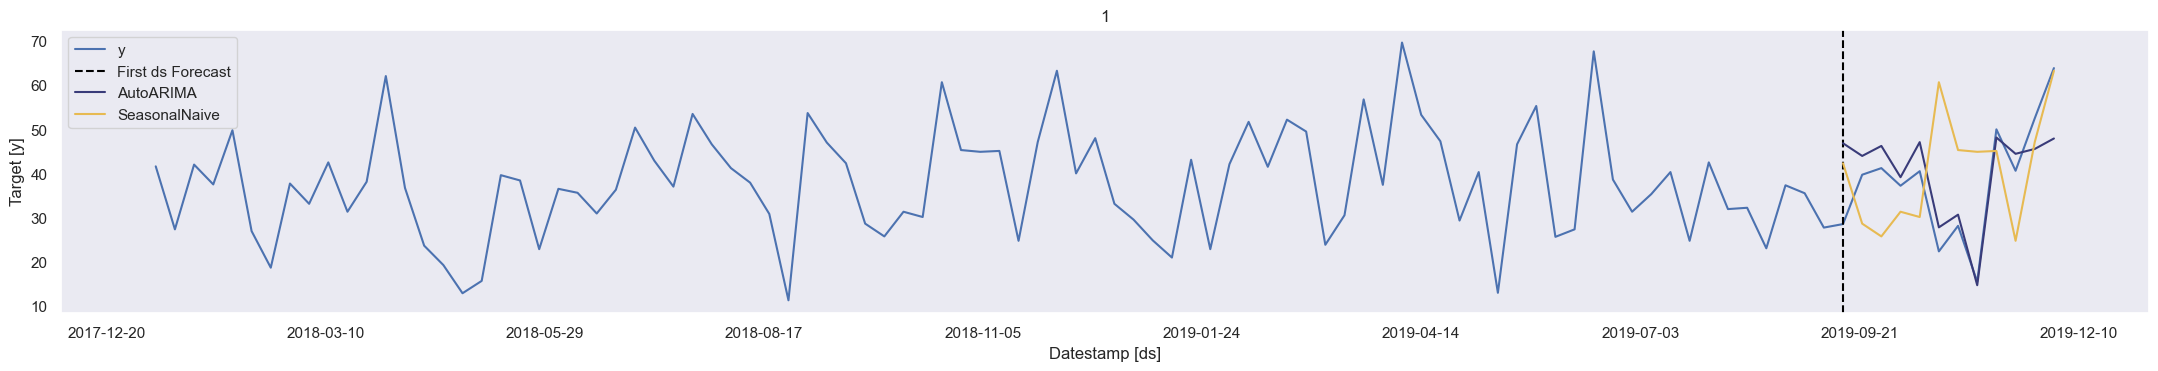

In [17]:
sf.plot(df, Y_hat, max_insample_length=100)

# **Evaluate the model** <a id="6"></a> 

[Table of Contents](#0.1)

In [18]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [19]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [20]:
actual=df2[df2.ds>'2019-09-08']

In [21]:
evaluate_performace(train_exo, actual,Y_hat.reset_index() , models=['AutoARIMA', "SeasonalNaive"])

,mase,mae,mape,rmse,smape
AutoARIMA,0.403699,6.130676,16.565156,8.092149,15.144379
SeasonalNaive,0.925179,14.050000,53.391192,17.425700,39.378609


# **Conclusion** <a id="7"></a> 

In this real estate price forecasting study, two models were used: AutoARIMA and SeasonalNaive. The obtained results show that the AutoARIMA model demonstrated better performance compared to the SeasonalNaive model in terms of several evaluation metrics.

In [22]:
print(evaluate_performace(train_exo, actual,Y_hat.reset_index() , models=['AutoARIMA', "SeasonalNaive"]))

                   mase        mae       mape       rmse      smape
AutoARIMA      0.403699   6.130676  16.565156   8.092149  15.144379
SeasonalNaive  0.925179  14.050000  53.391192  17.425700  39.378609


The results of this study indicate that the AutoARIMA model outperformed the SeasonalNaive model in terms of accuracy and forecasting ability of real estate prices. These findings support the choice of the AutoARIMA model as the preferred model for real estate price forecasting, as it provides a better estimate of future values and can be a valuable tool for real estate market players in making informed decisions.

We can consider other aspects to improve the model:

- Include Exogenous variables to the model
- Train different models that can improve performance.
- Add prediction interval.
- Develop a Cross Validations.
- Train Machine Learning and Deep Learning Models.

# **References** <a id="8"></a> 

1. [Nixtla Parameters](https://nixtla.github.io/statsforecast/src/core/models.html#autoarima).
2. [Pandas available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
3. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”.](https://otexts.com/fpp3/tscv.html).
4. [Seasonal periods- Rob J Hyndman](https://robjhyndman.com/hyndsight/seasonal-periods/).
5. [AutoArima model](https://nixtla.github.io/statsforecast/docs/models/autoarima.html)